<a href="https://colab.research.google.com/github/Mittapelly-Niharika/Building-MLP-model-/blob/main/Object_dectection_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from torchvision import transforms

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import cv2
from google.colab.patches import cv2_imshow




In [7]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [8]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [9]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'

--2025-03-11 09:59:32--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.43.9, 52.216.209.33, 52.217.117.185, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.43.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg’

000000037777.jpg    100%[===================>]  39.88K  --.-KB/s    in 0.03s   

2025-03-11 09:59:32 (1.32 MB/s) - ‘000000037777.jpg’ saved [40833/40833]



In [10]:
ig = Image.open("/content/000000037777.jpg")

In [12]:
from torchvision import transforms
# ... your existing code ...

transform = transforms.ToTensor()
img = transform(ig)

In [13]:
with torch.no_grad():
    prediction = model([img])

In [16]:
prediction[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [17]:
bboxes , labels, scores = prediction[0]['boxes'], prediction[0]['labels'], prediction[0]['scores']

In [18]:
scores

tensor([0.9943, 0.9886, 0.9625, 0.9046, 0.9044, 0.9027, 0.8800, 0.8290, 0.8278,
        0.8212, 0.7828, 0.7669, 0.6758, 0.6336, 0.5739, 0.5215, 0.5204, 0.4837,
        0.4741, 0.4501, 0.4474, 0.4294, 0.4084, 0.4043, 0.3769, 0.3628, 0.3377,
        0.3350, 0.3132, 0.2829, 0.2650, 0.2508, 0.2496, 0.2413, 0.2190, 0.2135,
        0.1736, 0.1730, 0.1327, 0.1309, 0.1267, 0.1263, 0.1160, 0.1145, 0.1102,
        0.1016, 0.0982, 0.0886, 0.0869, 0.0858, 0.0808, 0.0737, 0.0728, 0.0678,
        0.0673, 0.0658, 0.0650, 0.0622, 0.0616, 0.0575, 0.0547, 0.0534, 0.0515,
        0.0501])

In [19]:
num = torch.argwhere(scores>0.9).shape[0]

In [21]:
num

6

In [22]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [28]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [31]:
igg = cv2.imread("/content/000000037777.jpg")
for i in range(num):
  x1,y1,x2,y2 = bboxes[i].numpy().astype("int")
  igg = cv2.rectangle(igg , (x1,y1) , (x2,y2) , (0,255,0) , 1)
  # Get the class name from coco_names using the label index
  class_name = coco_names[labels[i].item() -1]
  igg = cv2.putText(igg , class_name, (x1,y1-10),font,0.5,(0,255,0),1,cv2.LINE_AA)

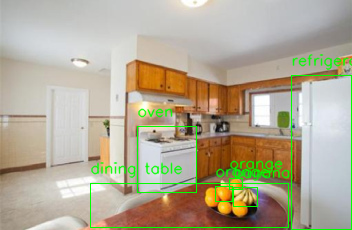

In [32]:
cv2_imshow(igg)

In [25]:
bboxes

tensor([[291.8007,  75.4907, 351.0379, 229.7333],
        [137.4995, 126.4641, 196.7451, 192.7782],
        [233.8998, 187.4761, 257.3713, 206.0314],
        [ 90.1806, 183.4493, 288.7284, 227.4105],
        [215.5326, 186.7111, 232.5018, 201.2200],
        [229.1946, 178.4547, 242.4028, 189.1366],
        [204.3889, 187.5528, 220.3058, 207.7724],
        [231.4346, 200.6802, 247.8696, 217.5509],
        [217.1698, 200.3502, 231.5009, 214.5559],
        [204.0359, 181.5956, 255.1724, 215.4856],
        [ 98.9669, 120.1149, 110.5809, 174.5164],
        [102.2467, 119.0014, 109.8358, 135.8731],
        [264.9863, 133.9124, 294.1249, 137.5284],
        [232.7792, 188.8490, 246.7510, 200.8903],
        [256.4788, 132.5554, 295.4839, 138.3106],
        [175.0202, 110.8700, 185.6927, 137.3661],
        [273.3569, 135.1965, 294.8690, 137.8414],
        [263.4073, 128.6209, 298.7946, 137.3732],
        [197.2355, 181.2733, 263.8224, 219.3763],
        [218.0015, 199.0363, 246.3781, 217.2725],
